In [2]:
import cifar10
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


ModuleNotFoundError: No module named 'cifar10'

## Importing Datsets

In [1]:
cifar10.data_path = "data/CIFAR-10/"

NameError: name 'cifar10' is not defined

In [ ]:
cifar10.maybe_download_and_extract()

In [3]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [4]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


## Analysing the data

In [5]:
## It represents the RGB values of the pixel(12,22) of 5th image in training dataset 
images_train[5][12][22]

array([ 0.78823529,  0.28235294,  0.27058824])

### Flattening the image data

In [6]:
images_train.shape

(50000, 32, 32, 3)

In [7]:
images_test.shape

(10000, 32, 32, 3)

In [8]:
x_train = images_train.reshape(images_train.shape[0],-1)
x_test = images_test.reshape(images_test.shape[0], -1)

In [9]:
x_train.shape

(50000, 3072)

In [10]:
x_test.shape

(10000, 3072)

In [11]:
y_train = cls_train
y_test = cls_test

In [12]:
labels_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.]])

## Plotting Images

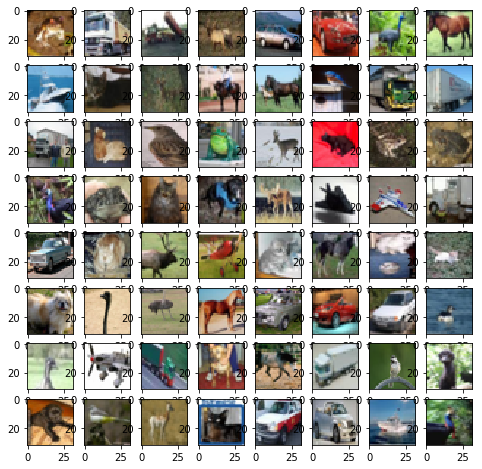

In [13]:
# plotting first 64 images
fig = plt.figure(figsize=(8,8))

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(images_train[i], cmap = plt.cm.bone)
plt.show()

## Applying PCA

In [14]:
pca = PCA()
pca.fit_transform(x_train)

array([[ -6.40101763e+00,   2.72903876e+00,   1.50171052e+00, ...,
         -7.62287826e-04,  -1.16359323e-03,  -3.49768400e-04],
       [  8.29783385e-01,  -9.49943219e-01,   6.00375260e+00, ...,
          1.08434589e-04,   5.76715387e-04,  -7.71005927e-04],
       [  7.73019978e+00,  -1.15221023e+01,  -2.75362051e+00, ...,
         -1.04460109e-03,  -2.14105740e-04,  -3.93469526e-04],
       ..., 
       [  7.07346587e-01,  -1.13425212e+01,  -3.93914878e-01, ...,
         -3.80341568e-04,   1.86432348e-03,   1.44785229e-03],
       [  1.13679090e+01,  -3.37597765e+00,   5.56619766e+00, ...,
         -4.67096832e-04,   7.44972963e-04,  -1.67065056e-03],
       [  4.19279645e+00,  -1.18418848e+00,  -4.44596297e+00, ...,
          9.67968258e-04,   2.40363971e-04,  -2.80506224e-05]])

In [15]:
pca.explained_variance_.shape

(3072,)

In [16]:
# Calculating optimal k to have 95% (say) variance 

k = 0
total = sum(pca.explained_variance_)
current_sum = 0

while(current_sum / total < 0.99):
    current_sum += pca.explained_variance_[k]
    k += 1
k

658

In [17]:
## Applying PCA with k calcuated above

pca = PCA(n_components=k, whiten=True)

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

## Prediction using Random Forest

In [19]:
## Training
rf = RandomForestClassifier()
rf.fit(x_train_pca, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
## Predicting
y_pred_rf = rf.predict(x_test_pca)

random_forest_score = accuracy_score(y_test, y_pred_rf)
random_forest_score

0.22689999999999999

## Prediction using KNN

In [21]:
## Training 
knn = KNeighborsClassifier()
knn.fit(x_train_pca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [22]:
## Predicting
y_pred_knn = knn.predict(x_test_pca)

knn_score = accuracy_score(y_test, y_pred_knn)
knn_score

0.14460000000000001

## Prediction using Logistic Regression 

In [23]:
## Training 
lr = LogisticRegression()
lr.fit(x_train_pca, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
## Predicting
y_pred_lr = lr.predict(x_test_pca)
logistic_regression_score = accuracy_score(y_test, y_pred_lr)
logistic_regression_score

0.3982

## Prediction using SVM

In [25]:
## Training
svc = svm.SVC()
svc.fit(x_train_pca, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
## Predicting 
y_pred_svm = svc.predict(x_test_pca)
svc_score = accuracy_score(y_test, y_pred_svm)
svc_score

0.48409999999999997

## Comparison between various Classifier

In [31]:
print("RandomForestClassifier : ", random_forest_score)
print("K Nearest Neighbors : ", knn_score)
print("Logistic Regression : ", logistic_regression_score)
print("Support Vector Classifier : ", svc_score)

RandomForestClassifier :  0.287
K Nearest Neighbors :  0.2284
Logistic Regression :  0.4076
Support Vector Classifier :  0.5522


### Till Now,  Best accuracy comes from Support vector classifier

## Implementing Neural Network

In [18]:
## Creating a model

from keras.models import Sequential
model = Sequential()


Using TensorFlow backend.


In [19]:
from  keras.layers  import Dense

# For first layer, input shape must be supplied
layer1 = Dense(units = 50, activation = 'relu', input_dim = k)
model.add(layer1)

layer2 = Dense(units = 25, activation = 'relu')
model.add(layer2)

layer3 = Dense(units = 10, activation = 'sigmoid')
model.add(layer3)

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [21]:
## Onehot Encoding the labels
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

y_train_encoded = enc.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = enc.transform(y_test.reshape(-1, 1))

In [82]:
model.fit(x_train_pca, y_train_encoded, epochs=50)

Epoch 1/50
50000/50000 [==============================] - 5s 104us/step - loss: 0.1488 - acc: 0.9418
Epoch 2/50
50000/50000 [==============================] - 5s 106us/step - loss: 0.1478 - acc: 0.9423
Epoch 3/50
50000/50000 [==============================] - 5s 100us/step - loss: 0.1460 - acc: 0.9428
Epoch 4/50
50000/50000 [==============================] - 5s 98us/step - loss: 0.1446 - acc: 0.9437
Epoch 5/50
50000/50000 [==============================] - 5s 96us/step - loss: 0.1436 - acc: 0.9437
Epoch 6/50
50000/50000 [==============================] - 5s 97us/step - loss: 0.1422 - acc: 0.9447
Epoch 7/50
50000/50000 [==============================] - 5s 97us/step - loss: 0.1417 - acc: 0.9444
Epoch 8/50
50000/50000 [==============================] - 5s 97us/step - loss: 0.1404 - acc: 0.9454
Epoch 9/50
50000/50000 [==============================] - 5s 98us/step - loss: 0.1393 - acc: 0.9456
Epoch 10/50
50000/50000 [==============================] - 5s 97us/step - loss: 0.1382 - acc: 0.9

In [83]:
predictions = model.predict(x_test_pca)

In [84]:
predictions_decoded = []

for x in predictions:
    for i in range(x.shape[0]):
        if x[i] == max(x):
            predictions_decoded.append(i)
            break

## Export best Predictions

In [86]:
labels = []
for i in range(len(predictions_decoded)):
    labels.append(class_names[predictions_decoded[i]])

In [87]:
np.savetxt("predictions.csv", labels, fmt = '%s')

In [85]:
accuracy_score(y_test, predictions_decoded)

0.40210000000000001